### Университет ИТМО

Домашнее задание №1
по дисциплине "Алгоритмы и структуры данных"

*Выполнил*: Логунов Алексей

*Группа*: К3243

*Преподаватель*: Сорокин Дмитрий Сергеевич

Санкт-Петербург - 2017

# Вспомогательные функции

In [35]:
import random
import time
from matplotlib import pyplot as plt

def getRandomSeq(length, start=0, end=100):
    return [random.randint(start, end) for _ in range(length)]

def exec_time(func, seq):
    start_time = time.time()
    func(seq)
    start_time = time.time() - start_time
    #print("%s" % start_time)
    #print("Function's {0} execution time: {1} second{2}".format(func.__name__, \
          #"%s" % (time.time() - start_time), \
          #"s" if start_time != 1 else ""))
    return start_time
    
def plotTimeComplexity(func, min_sizes=1000, max_sizes=10000, step=20):
    if min_sizes > max_sizes:
        min_sizes, max_sizes = max_sizes, min_sizes
    # При количестве сортируемых элементов <1000, 
    # функция time.time() показывает не в полне корректные данные (для рекурсивных алгоритмов),
    # а именно "0.0"
    results = []
    for i in range(0, max_sizes, step):
        results.append(exec_time(func, getRandomSeq(i)) * 1000)
    
    plt.xlabel("Количество элементов")
    plt.ylabel("Время выполнения * $10^3$")
    plt.title(func.__name__)
    plt.plot(range(0, max_sizes, step), results, color='green')
    plt.show()

# Bubble sort

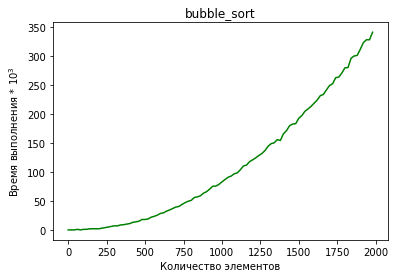

In [19]:
def bubble_sort(seq):
    for i in range(len(seq)):
        is_sorted = True
        for j in range(len(seq) - 1 - i):
            if seq[j] > seq[j + 1]:
                seq[j], seq[j + 1] = \
                seq[j + 1], seq[j]
                is_sorted = False
        if is_sorted:
            break

plotTimeComplexity(bubble_sort, min_sizes=500, max_sizes=2000)

Сложность алгоритма: $O(N) = N^2$

# Insertion sort

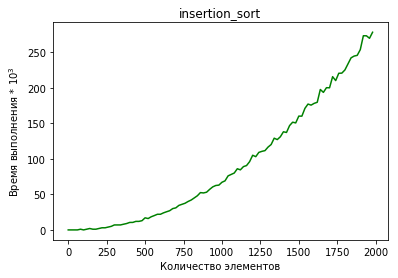

In [21]:
def insertion_sort(seq):
    for i in range(1, len(seq)):
        k = i
        while k > 0:
            if seq[k] < seq[k - 1]:
                seq[k], seq[k - 1] = seq[k - 1], seq[k]
                k -= 1
            else:
                break
                
plotTimeComplexity(insertion_sort, min_sizes=500, max_sizes=2000)

Сложность алгоритма: $O(N) = N^2$

# Selection sort

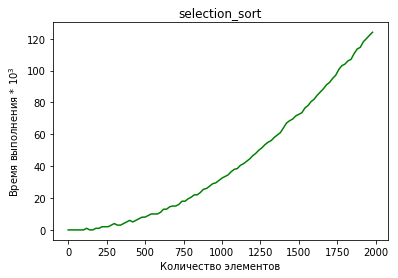

In [25]:
def selection_sort(seq):
    for i in range(len(seq) - 1):
        temp = i
        for j in range(i + 1, len(seq)):
            if seq[j] < seq[temp]:
                temp = j
        seq[temp], seq[i] = seq[i], seq[temp]
        
plotTimeComplexity(selection_sort, min_sizes=500, max_sizes=2000)

Сложность алгоритма: $O(N) = N^2$

# Quick sort

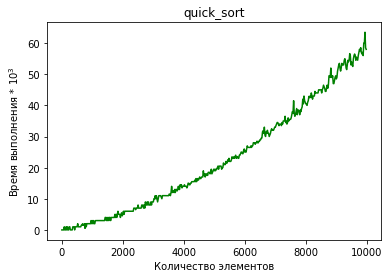

In [32]:
def quick_sort(seq):
    if len(seq) == 0:
        return []
    pivot = seq[0]
    left_part = quick_sort([x for x in seq[1:] if x < pivot])
    right_part = quick_sort([x for x in seq[1:] if x >= pivot])
    return left_part + [pivot] + right_part

plotTimeComplexity(quick_sort)

Сложность алгоритма: $O(N) = Nlog(N)$

# Merge sort

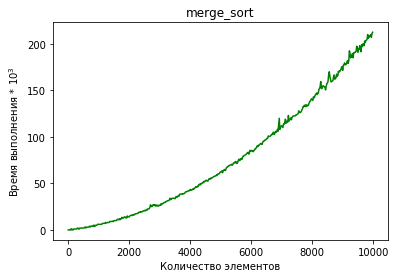

In [33]:
def merge_sort(seq):
    if len(seq) <= 1:
        return seq
    
    mid = int(len(seq) / 2)
    left = merge_sort(seq[:mid])
    right = merge_sort(seq[mid:])
    
    res = []
    while len(left) > 0 and len(right) > 0:
        if left[0] <= right[0]:
            res.append(left[0])
            left = left[1:]
        else:
            res.append(right[0])
            right = right[1:]
    if len(left) > 0:
        res += left
    if len(right) > 0:
        res += right
    return res
    

plotTimeComplexity(merge_sort)

Сложность алгоритма: $O(N) = N log(N)$